In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/tensorflow/docs

# Imports

In [4]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

import zipfile
from zipfile import ZipFile

import json

import tqdm

import pickle
from pickle import dump

import time
import tqdm
from tqdm import trange


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import keras
from keras.layers import Dense, Activation, Flatten
from keras.applications.vgg16 import  preprocess_input

from text_utilities import *
from video_utilities import *
from pipeline_attention_utilities_new import *
from pre_trained_models import *


import nltk
nltk.download('wordnet')
from nltk.translate.meteor_score  import  single_meteor_score as meteor_

[nltk_data] Downloading package wordnet to /root/nltk_data...


# DataFrame Creation

In [ ]:
# tr_zip = '/content/drive/MyDrive/Video_Cap_Data/train_val_videos.zip'
# tst_zip = '/content/drive/MyDrive/Video_Cap_Data/test_videos.zip'

# dest_path_tr = '/content/drive/MyDrive/Video_Cap_Data/Train_Val_videos'
# dest_path_tst = '/content/drive/MyDrive/Video_Cap_Data/Test_videos'

# with ZipFile(tr_zip, 'r') as zip_ref:
#     zip_ref.extractall(dest_path_tr)
#     zip_ref.close()

In [ ]:
# with ZipFile(tst_zip, 'r') as zip_ref:
#     zip_ref.extractall(dest_path_tst)
#     zip_ref.close()


In [ ]:
# tst_json = '/content/drive/MyDrive/Video_Cap_Data/test_videodatainfo.json'

# tr_json = '/content/drive/MyDrive/Video_Cap_Data/train_val_annotation/train_val_videodatainfo.json'


# with open(tr_json) as f:
#    data = json.load(f)

# tr_videos = data["videos"]
# tr_sentences = data["sentences"]

# f.close()

# tr_videos[33] , tr_sentences[33]    # len : 7010

In [ ]:
# with open(tst_json) as f:
#    data_ = json.load(f)

# tst_videos = data_["videos"]
# tst_sentences = data_["sentences"]

# f.close()

In [ ]:
# tst_videos[0]

In [ ]:
# tst_sentences[0] , tr_sentences[0]

In [ ]:
# def create_dict (sentences , videos, base_path , tst =False):
#   dict_ = {
#       'category' : [],
#       'video_id' : [],
#       'time' : [],
#       'caption' : [],
#       'split' : [],
#       'path': []
#   }

#   for i in range(len(sentences)):

#     dict_['caption'].append(sentences[i]['caption'])

#     vid_id = sentences[i]['video_id']
#     path = os.path.join(base_path, vid_id+'.mp4')
#     dict_['path'].append(path)
#     dict_['video_id'].append(vid_id)

#     idx = (int)(vid_id[5:])     # taking numeric code of video_id
#     if(tst):
#       idx -= 7010
#     dict_['category'].append(videos[idx]['category'])


#     time = videos[idx]['end time'] - videos[idx]['start time']
#     dict_['time'].append(time)

#     dict_['split'].append(videos[idx]['split'])


#   return dict_


In [ ]:
# tr_val_base_path = '/content/drive/MyDrive/Video_Cap_Data/Train_Val_videos/TrainValVideo'
# tr_val_dict = create_dict(tr_sentences, tr_videos, tr_val_base_path)

# tst_base_path = '/content/drive/MyDrive/Video_Cap_Data/Test_videos/TestVideo'
# tst_dict = create_dict(tst_sentences , tst_videos,tst_base_path,  True)

In [ ]:
# df_tr_val = pd.DataFrame(tr_val_dict)
# df_tst = pd.DataFrame(tst_dict)
# df_tr_val.shape

In [ ]:
# df_tr_val.head()

In [ ]:
# tr_val_caps = text_clean(df_tr_val, 3)
# tst_caps = text_clean(df_tst ,3)

# df_tr_val['caption'] = tr_val_caps
# df_tst['caption'] = tst_caps


# df_tst.head(2)

# Pickling DataFrames

In [ ]:
# df_train = df_tr_val[df_tr_val['split']=='train']
# df_val = df_tr_val[df_tr_val['split']=='validate']

# path_tr = '/content/drive/MyDrive/Video_Cap_Data/Pickles/df_train.pkl'
# dump(df_train, open(path_tr, 'wb'))      # wb --> write binary

# path_val = '/content/drive/MyDrive/Video_Cap_Data/Pickles/df_val.pkl'
# dump(df_val, open(path_val, 'wb'))      # wb --> write binary

# path_tst = '/content/drive/MyDrive/Video_Cap_Data/Pickles/df_tst.pkl'
# dump(df_tst, open(path_tst, 'wb'))      # wb --> write binary


# Unpickling DataFrames

In [7]:
f = open("/content/drive/MyDrive/Video_Cap_Data/Pickles/df_train.pkl", "rb")
df_tr = pickle.load(f)
f.close()

f = open("/content/drive/MyDrive/Video_Cap_Data/Pickles/df_val.pkl", "rb")
df_val = pickle.load(f)
f.close()

f = open("/content/drive/MyDrive/Video_Cap_Data/Pickles/df_tst.pkl", "rb")
df_tst = pickle.load(f)
f.close()

df_tr.shape , df_val.shape , df_tst.shape

((130260, 6), (9940, 6), (59800, 6))

In [8]:
df_tr = df_tr.iloc[:50000, :]
df_tr.shape

(50000, 6)

In [9]:
df_tst = df_tst.iloc[:30000, :]
df_tst.shape

(30000, 6)

In [ ]:
df_tr.head()

,category,video_id,time,caption,split,path
0,2,video2960,12.32,<start> cartoon animals runs through an ice c...,train,/content/drive/MyDrive/Video_Cap_Data/Train_Va...
1,2,video2960,12.32,<start> cartoon character runs around inside ...,train,/content/drive/MyDrive/Video_Cap_Data/Train_Va...
2,2,video2960,12.32,<start> character is running in the snow <end>,train,/content/drive/MyDrive/Video_Cap_Data/Train_Va...
3,2,video2960,12.32,<start> person plays video game centered arou...,train,/content/drive/MyDrive/Video_Cap_Data/Train_Va...
4,2,video2960,12.32,<start> person plays online and records thems...,train,/content/drive/MyDrive/Video_Cap_Data/Train_Va...


In [10]:
df_tr = df_tr.sample(frac=1).reset_index(drop=True)

In [11]:
df_val = df_val.sample(frac=1).reset_index(drop=True)

In [12]:
def get_unique(df):
  unique = set()
  for vid_id in df['video_id']:

    unique.add(vid_id[5:])
  return unique

set_tr = get_unique(df_tr)
set_val = get_unique(df_val)
set_tst = get_unique(df_tst)

len(set_tr), len(set_val) , len(set_tst)

(2500, 497, 1500)

we have 20 captions per video

In [5]:
path = '/content/drive/MyDrive/Video_Cap_Data/train_val_annotation/category.txt'

classes = {}

with open(path) as f:
    lines = f.readlines()
    for line in lines:
      li = line.split('\t')
      li_ = li[1].split('\n')
      classes[int(li_[0])] = li[0]
    f.close()

print(classes)

{0: 'music', 1: 'people', 2: 'gaming', 3: 'sports/actions', 4: 'news/events/politics', 5: 'education', 6: 'tv shows', 7: 'movie/comedy', 8: 'animation', 9: 'vehicles/autos', 10: 'howto', 11: 'travel', 12: 'science/technology', 13: 'animals/pets', 14: 'kids/family', 15: 'documentary', 16: 'food/drink', 17: 'cooking', 18: 'beauty/fashion', 19: 'advertisement'}


# Plotting

In [15]:
duration_ = []
category_ = {}
vocab = []           # adding video_tags to vocab

for idx in range(0,len(df_tr), 20):
  time_ = ((df_tr.iloc[idx ,2]*100)//1)/100
  key = df_tr.iloc[idx, 0]
  if key not in category_:
    category_[key] = 0
  category_[key] += 1
  vocab.append(classes[key])

  duration_.append(time_)

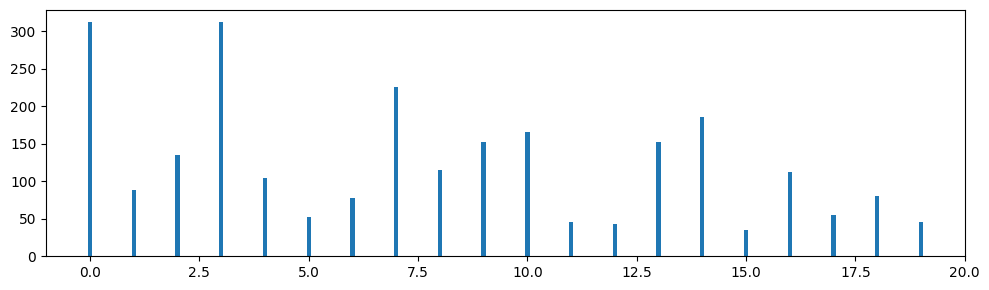

In [16]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 3),
                        tight_layout = True)

axs.bar(category_.keys(), category_.values(), 0.1 )
plt.show()


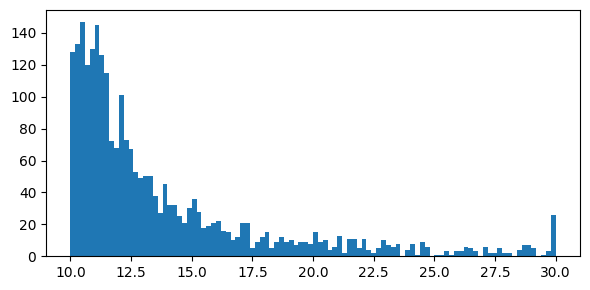

In [17]:
fig, axs = plt.subplots(1, 1,
                        figsize =(6, 3),
                        tight_layout = True)

axs.hist(duration_, bins = 100)
plt.show()


# Vocab Analysis

In [ ]:
vocab_ , vocab_size, max_len = create_vocabulary(df_tr , 3)
vocab.extend(vocab_)
vocab_size += len(category_.keys())

vocab_size, max_len , vocab[0]

(10929, 43, '<start>')

In [ ]:
vocab[:4]

['<start>', 'man', 'speaking', 'to']

# Word Freq Distribution

In [ ]:
# def encode_sequences(captions ,top_k= vocab_size, max_len = max_len):
#   tokenizer = Tokenizer(num_words=top_k,oov_token="<unk>",filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

#   tokenizer.fit_on_texts(captions)
#   seqs = tokenizer.texts_to_sequences(captions)

#   # Map '<pad>' to '0'
#   tokenizer.word_index[' '] = 0
#   tokenizer.index_word[0] = ' '

#   return  tokenizer

# tokenizer = encode_sequences(df_tr['caption'])

In [ ]:
path = '/content/drive/MyDrive/Video_Cap_Data/Pickles/Tokenizer.pkl'

if  not os.path.exists(path):
  dump(tokenizer, open(path, 'wb'))      # wb --> write binary

tokenizer = pickle.load(open(path, 'rb'))      # rb --> read binary

def get_seqs(tokenizer, captions, max_len):
  # Create the tokenized vectors
  seqs = tokenizer.texts_to_sequences(captions)
  seqs = pad_sequences(seqs, maxlen= max_len, padding='post')
  return seqs

In [ ]:
tokenizer.index_word[0]

' '

In [ ]:
BATCH_SIZE = 128
BUFFER_SIZE = 256

r1 = len(df_tr)%BATCH_SIZE
r2 = len(df_val)%BATCH_SIZE
r3 = len(df_tst)%BATCH_SIZE

df_tr = df_tr.iloc[r1:, :]
df_val= df_val.iloc[r2:, :]
df_tst = df_tst.iloc[r3:, :]

df_tr = df_tr.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)
df_tst = df_tst.sample(frac=1).reset_index(drop=True)


In [ ]:
train_seqs = get_seqs(tokenizer, df_tr['caption'], max_len)
val_seqs = get_seqs(tokenizer, df_val['caption'], max_len)
tst_seqs = get_seqs(tokenizer, df_tst['caption'], max_len)

train_seqs.shape

(49920, 43)

In [20]:
n_frames = 20
h , w = 224, 224

In [27]:
path= '/content/drive/MyDrive/Video_Cap_Data/Train_Val_videos/TrainValVideo'
video_path = os.path.join(path, df_tr.iloc[290 ,1]+'.mp4')

sample_video = frames_from_video_file(video_path, h, 4*n_frames, 1)
sample_video.shape

(81, 224, 224, 3)


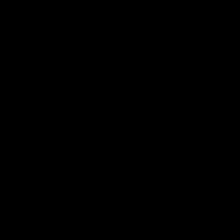

In [28]:
# Plotting gif

to_gif(sample_video*255)   # w,h = 112,112

# Generating Frames

In [ ]:
# X_tr = list(set_tr)
# base_path_tr = '/content/drive/MyDrive/Video_Cap_Data/Train_Val_videos/TrainValVideo'

# X_val = list(set_val)
# base_path_val = '/content/drive/MyDrive/Video_Cap_Data/Train_Val_videos/TrainValVideo'

# X_tst = list(set_tst)
# base_path_tst = '/content/drive/MyDrive/Video_Cap_Data/Test_videos/TestVideo'


In [ ]:
# fg_2d = FrameGenerator(X_tr, base_path_tr ,h, n_frames)
# hi_2d = FrameGenerator(X_val, base_path_val, h, n_frames)
# gh_2d =  FrameGenerator(X_tst, base_path_tst,h, n_frames)


# fg_3d = FrameGenerator(X_tr, base_path_tr ,h, 5*n_frames, 2)
# hi_3d = FrameGenerator(X_val, base_path_val, h, 5*n_frames ,2)
# gh_3d =  FrameGenerator(X_tst, base_path_tst,h, 5*n_frames, 2)

# frames, vid_id = next(fg_3d())

# print(f"Shape: {frames.shape}")
# print(f"video_id: {vid_id}")       # tokenized_caption


In [ ]:
# a = fg_3d()

# ct = 5
# while ct>0:
#   ct -=1
#   frames, vid_id = next(a)
#   print(vid_id)


# Extracting temporal features

In [ ]:
# img_features = cnn_model()

Testing VGG16 on a sample

---



In [ ]:
# train_frames, train_labels = next(fg_2d())
# print(train_frames.shape)
# sample_features = img_features(train_frames)
# sample_features.shape

# Extract Motion Features

In [ ]:
# import tensorflow_hub as hub
# i3d = hub.load("https://tfhub.dev/deepmind/i3d-kinetics-400/1").signatures['default']

In [ ]:
# spatial_temporal_features = cnn_3D_video(i3d)

Testing on sample case

In [ ]:
# x = tf.expand_dims(sample_video, axis=0)             # [None, None, None ,None ,3]
# y = spatial_temporal_features(x)
# logits = i3d(x)
# logits.keys()

In [ ]:
# y.shape

# Storing .npy of features

In [ ]:
# a = hi_2d()

# def get_vectors( model, path ,total_vids , is_2d= False):
#   ct = 0
#   while total_vids >0:
#     total_vids -=1
#     ct+=1
#     if ct%100 ==0:
#       print(ct)

#     frames, id =  next(a)
#     if not is_2d:
#       sz = frames.shape                 # Converting (100, h, w, c)  --> (5, 20, h, w, c)
#       c, w ,h = sz[3], sz[2] ,sz[1]     # getting 5 spatio_temporal features of a set of 5 (20 consecutive frames)
#       n_vid = sz[0]//20
#       frames = frames.reshape(n_vid, 20 ,h,w,c)

#     feature = model(frames)
#     full_path = os.path.join(path ,str(id))

#     np.save(full_path, feature.numpy())

In [ ]:
# q = '/content/drive/MyDrive/Video_Cap_Data'

# features_2d = os.path.join(q, 'features_2d')
# if not os.path.exists(features_2d):
#   os.mkdir(features_2d)

# get_vectors(img_features, features_2d, len(set_tr), True)
# get_vectors(img_features, features_2d, len(set_val), True)

In [ ]:
# features_3d = os.path.join(q, 'features_3d')
# if not os.path.exists(features_3d):
#   os.mkdir(features_3d)
# # get_vectors(spatial_temporal_features, features_3d, len(set_tr), is_2d= False)
# get_vectors(spatial_temporal_features, features_3d, len(set_val), False)

# Building Input PipeLine
Loading the .npy files

In [ ]:
# arr = np.arange(10)
# tensor_2d, tensor_3d ,cap = load_npy('video0', arr, features_2d, features_3d)
# tensor_2d.shape , tensor_3d.shape

In [ ]:
# Creating train and test dataset

train_ds = create_dataset(df_tr['video_id'] ,train_seqs, BATCH_SIZE, BUFFER_SIZE)
val_ds = create_dataset(df_val['video_id'] , val_seqs, BATCH_SIZE, BUFFER_SIZE)

train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))

In [ ]:
len(train_ds)

390

# Optimizer , Loss, Metric

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0016)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


@tf.function
def masked_loss(labels, preds):
  loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels, preds)    #  between logits (Unscaled log probabilities) and labels.

  # only consider those losses which have
  # decent prob of occurrence for that word at that position
  mask = (labels != 0) & (loss < 1e8)
  mask = tf.cast(mask, loss.dtype)

  loss = loss*mask
  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

@tf.function
def masked_acc(labels, preds):
  mask = tf.cast(labels!=0, tf.float32)
  labels = tf.cast(labels, tf.int64)
  preds = tf.argmax(preds, axis=-1)
  match_ = tf.cast(preds == labels, mask.dtype)

  # how many words at same location in preds wrt labels
  acc = tf.reduce_sum(match_*mask)/tf.reduce_sum(mask)
  return acc


@tf.function
def meteor(real_captions , pred_captions):
  return meteor_(real_captions,pred_captions )

# Architecture Config

In [ ]:
embedding_dim = 256
units = 256
num_steps_tr = len(df_tr) // BATCH_SIZE
num_steps_val = len(df_val)//BATCH_SIZE
EPOCHS = 1

In [ ]:
encoder_2d = Encoder(embedding_dim)
encoder_3d = Encoder(embedding_dim)
decoder = Decoder(tokenizer ,BATCH_SIZE, units, vocab_size, embedding_dim)


Uniform entropy: 9.30
Marginal entropy: 5.81


# Saving Checkpoint

In [ ]:
checkpoint_path_ckpt = '/content/drive/MyDrive/Video_Cap_Data/Checkpoints'
if not os.path.isdir(checkpoint_path_ckpt):
  os.mkdir(checkpoint_path_ckpt)

ckpt = tf.train.Checkpoint(encoder_2d = encoder_2d,
                           encoder_3d = encoder_3d,
                           decoder = decoder ,
                           optimizer = optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=2)

Start checkpointing from the checkpoint last saved

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
checkpoint_path = ckpt_manager.latest_checkpoint
ckpt.restore(checkpoint_path)

# Applying Gradient_descent
Evaluating loss , updating model_parameters

In [ ]:
train_loss_plot = []

@tf.function
def train_step(tensor_2d, tensor_3d , target):

  # initializing the hidden state for each batch
  # because the captions are not related from image to image

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)
  h = tf.zeros((BATCH_SIZE, units))
  c = tf.zeros((BATCH_SIZE, units))
  pred_tokens = None

  with tf.GradientTape() as tape:
    features_2d = encoder_2d(tensor_2d)
    features_3d = encoder_3d(tensor_3d)


    for i in range(1, max_len):
      # passing the features through the decoder
      pred, h, c = decoder(dec_input, features_2d, features_3d, h ,c)

      if pred_tokens is None :
        pred_tokens = pred

      else :
        pred_tokens = tf.concat([pred_tokens, pred], axis= 1)

      dec_input = target[:, i]          # teacher forcing
      dec_input = tf.expand_dims(dec_input, axis=1)

    loss = masked_loss(target[:, 1:], pred_tokens)
    acc = masked_acc(target[:, 1:] , pred_tokens)


  trainable_variables =  encoder_2d.trainable_variables +encoder_3d.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))
  return loss , acc

In [ ]:
test_loss_plot = []

@tf.function
def test_step(tensor_2d, tensor_3d, target):

  # initializing the hidden state for each batch
  # because the captions are not related from image to image

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)
  h = tf.zeros((BATCH_SIZE, units))
  c = tf.zeros((BATCH_SIZE, units))

  features_2d = encoder_2d(tensor_2d)
  features_3d = encoder_3d(tensor_3d)

  pred_tokens = None
  for i in range(1, max_len):

    pred, h, c = decoder(dec_input, features_2d, features_3d, h ,c)

    if pred_tokens is None :
      pred_tokens = pred

    else :
      pred_tokens = tf.concat([pred_tokens, pred], axis= 1)

    # not using teacher forcing, using pred word as next decoder input
    dec_input = tf.argmax(pred, axis=2)

  loss = masked_loss(target[:, 1:], pred_tokens)

  acc = masked_acc(target[:, 1:] , pred_tokens)

  return loss, acc

# Training Model

In [ ]:
train_loss_plot = []
train_score_plot = []

test_loss_plot = []
test_score_plot = []

path = '/content/drive/MyDrive/Video_Cap_Data/Pickles/Plots.pickle'
if os.path.exists(path):
  pickle_in = open(path)
  train_loss_plot, train_score_plot, test_loss_plot, test_score_plot = pickle.load(pickle_in)

In [ ]:
epoch = 0
for i in range(4):

    start = time.time()

    #For Train
    #================================================================
    total_loss_train = 0
    total_acc_train = 0
    ct=0
    for  i, (tensor_2d, tensor_3d, target) in enumerate(train_ds) :
      print('enter train_step  : ' , ct ,end ='  ')
      batch_loss, batch_acc = train_step(tensor_2d,tensor_3d, target)     # img_tensor : (10 , 49 , 512)
      total_loss_train += batch_loss
      ct +=1


      print('loss : ', batch_loss ,'   acc : ',batch_acc)
      total_acc_train += batch_acc


    # storing the epoch end loss value to plot later
    train_loss_plot.append(total_loss_train / num_steps_tr)
    train_score_plot.append(total_acc_train/num_steps_tr )

    # # Tensorboard
    # with train_summary_writer.as_default():
    #   tf.summary.scalar('LossPlotTrain', (total_loss_train/ num_steps), step=epoch)
    #   tf.summary.scalar('Train_loss', train_loss.result(), step=epoch)

    #For Test
    #================================================================
    total_loss_test = 0
    total_acc_test = 0
    ct=0
    for i,(tensor_2d, tensor_3d, target) in enumerate(val_ds):

        print('enter test_step  : ' , ct ,end= '  ' )
        batch_loss , batch_acc = test_step(tensor_2d, tensor_3d, target)
        total_loss_test += batch_loss
        ct+=1

        print('exit test step')
        total_acc_test += batch_acc


    # storing the epoch end loss value to plot later
    test_loss_plot.append(total_loss_test / num_steps_val)
    test_score_plot.append(total_acc_test/num_steps_val)
    # Tensorboard
    # with test_summary_writer.as_default():
    #   tf.summary.scalar('LossPlotTest', (total_loss_test/ num_steps), step=epoch)

    ckpt_manager.save()
    epoch += 1

    print ('Epoch : {}  tr_loss : {:.6f}   val_loss :  {:.6f}    tr_acc : {:.4f}   val_acc : {:.4f}'.format(epoch ,
                                                                                                                      (total_loss_train/num_steps_tr),
                                                                                                                      (total_loss_test/num_steps_val),
                                                                                                                      (total_acc_train/num_steps_tr),
                                                                                                                      (total_acc_test/num_steps_val)), end = '   ')
    print ('Time {:.2f} sec\n'.format(time.time() - start))

enter train_step  :  0  loss :  tf.Tensor(2.8382852, shape=(), dtype=float32)    acc :  tf.Tensor(0.4313099, shape=(), dtype=float32)
enter train_step  :  1  loss :  tf.Tensor(2.814875, shape=(), dtype=float32)    acc :  tf.Tensor(0.39337876, shape=(), dtype=float32)
enter train_step  :  2  loss :  tf.Tensor(2.833624, shape=(), dtype=float32)    acc :  tf.Tensor(0.40168244, shape=(), dtype=float32)
enter train_step  :  3  loss :  tf.Tensor(2.8984892, shape=(), dtype=float32)    acc :  tf.Tensor(0.3802521, shape=(), dtype=float32)
enter train_step  :  4  loss :  tf.Tensor(2.799979, shape=(), dtype=float32)    acc :  tf.Tensor(0.40603015, shape=(), dtype=float32)
enter train_step  :  5  loss :  tf.Tensor(2.8736808, shape=(), dtype=float32)    acc :  tf.Tensor(0.40083945, shape=(), dtype=float32)
enter train_step  :  6  loss :  tf.Tensor(2.930399, shape=(), dtype=float32)    acc :  tf.Tensor(0.3825079, shape=(), dtype=float32)
enter train_step  :  7  loss :  tf.Tensor(2.9878664, shape=(),

In [ ]:
path = '/content/drive/MyDrive/Video_Cap_Data/Pickles/Plots.pickle'

pickle_out = open(path,"wb")
pickle.dump((train_loss_plot, train_score_plot, test_loss_plot, test_score_plot), pickle_out)
pickle_out.close()

# Plot the Train and Validation Losses to check for overfitting

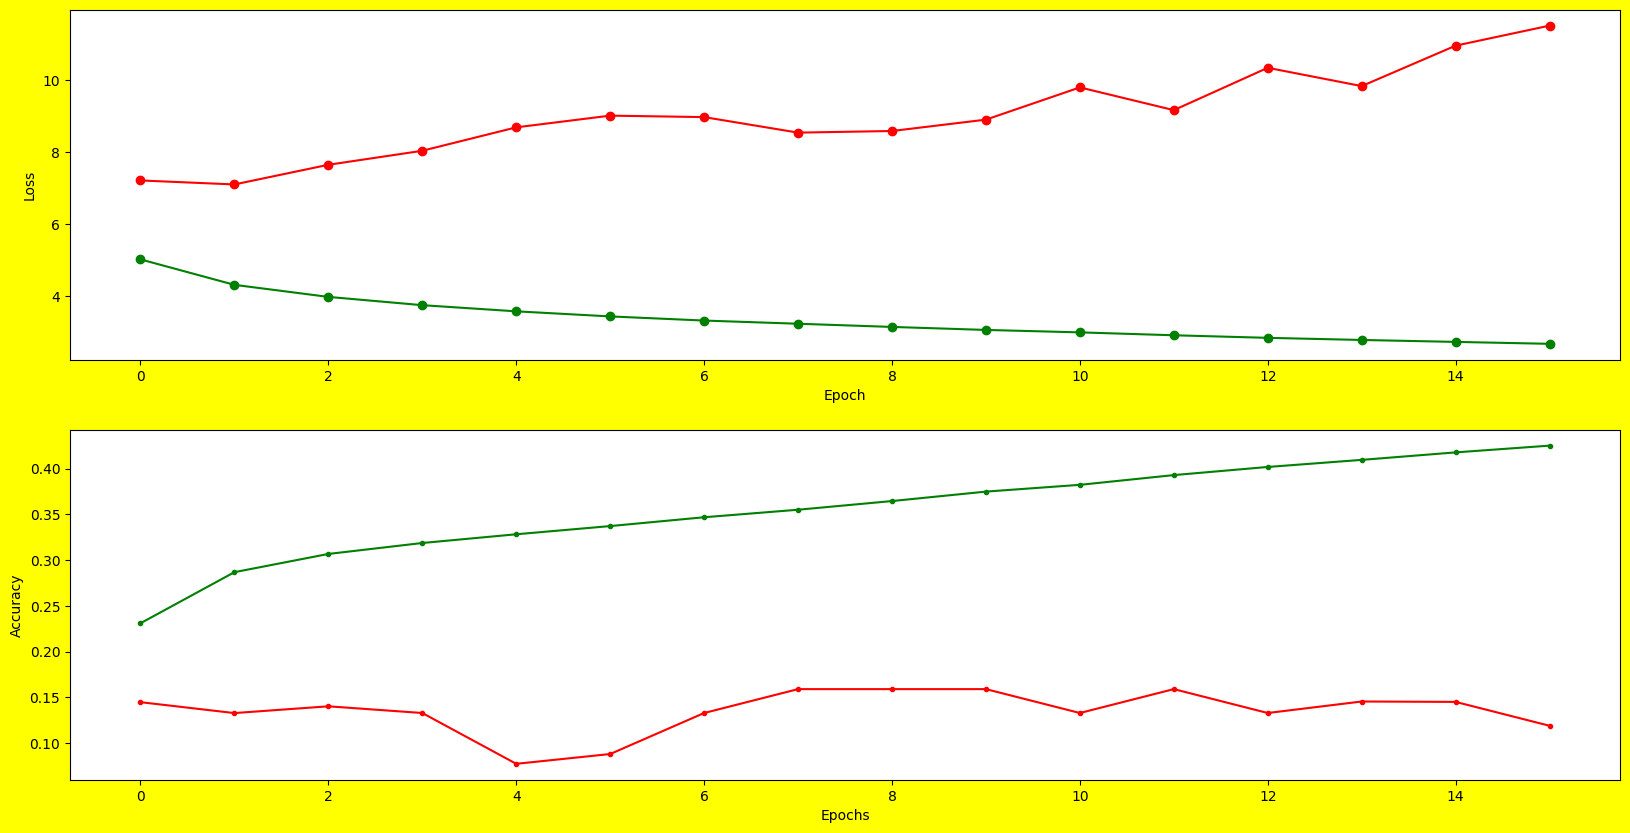

In [ ]:
plt.figure( figsize=(20,10), facecolor='yellow')

plt.subplot(2, 1, 1)
plt.plot(train_loss_plot, 'o-', color='green')
plt.plot(test_loss_plot, 'o-', color='red')
plt.ylabel('Loss')
plt.xlabel('Epoch')



plt.subplot(2, 1, 2)
plt.plot(train_score_plot, '.-', color='green')
plt.plot(test_score_plot, '.-', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

# Saving Model

In [ ]:
from keras.models import load_model

encoder_2d.save_weights('/content/drive/MyDrive/Video_Cap_Data/Pickles/encoder_vgg/weights' ,save_format='tf')  # creates a HDF5 file 'my_model.h5'
encoder_3d.save_weights('/content/drive/MyDrive/Video_Cap_Data/Pickles/encoder_movinet/weights' ,save_format='tf')  # creates a HDF5 file 'my_model.h5'
decoder.save_weights('/content/drive/MyDrive/Video_Cap_Data/Pickles/decoder/weights',save_format='tf')